In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
%matplotlib inline


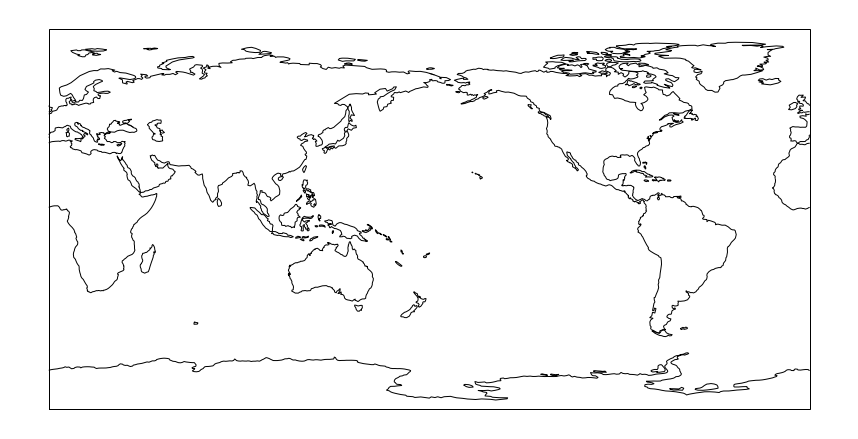

In [7]:
fig = plt.figure(figsize = [15,10])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

plt.show()


In [8]:
#https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
dataset = netCDF4.Dataset('/Users/scollis/Downloads/precip.mon.mean.nc')

In [9]:
print(dataset.variables.keys())
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
precip = dataset.variables['precip'][:]
print(dataset.variables['precip'].units)
print(lats.shape, lons.shape, precip.shape)

odict_keys(['lat', 'lon', 'time', 'precip'])
mm/day
(72,) (144,) (456, 72, 144)


In [10]:
darwin = [-12.4634, 130.8456]
manus = [-2.0941, 146.8761]
gan = [-0.6960, 73.1556]
north_anchor = [30, 90]

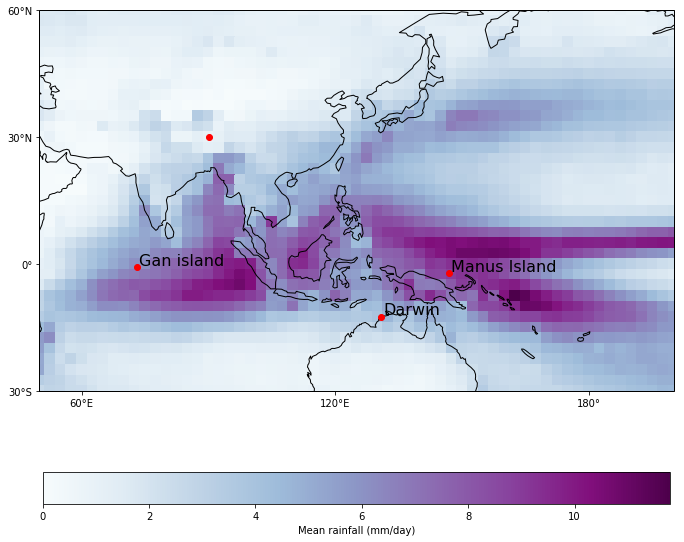

In [11]:
fig = plt.figure(figsize = [15,10])
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global() 
ax.coastlines()
cf = ax.pcolormesh(lons, lats, precip.mean(axis=0),
                transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BuPu'))

ax.plot([darwin[1], manus[1], gan[1], north_anchor[1]], 
        [darwin[0], manus[0], gan[0], north_anchor[0]],
       'ro', transform=ccrs.PlateCarree())

ax.text(darwin[1]+.5, darwin[0]+.5, 
        'Darwin', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(gan[1]+.5, gan[0]+.5, 
        'Gan island', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(manus[1]+.5, manus[0]+.5, 
        'Manus Island', transform=ccrs.PlateCarree(), fontsize = 16)


ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([50, 200, -30, 60], crs=ccrs.PlateCarree())
 
cb = plt.colorbar(mappable=cf, orientation='horizontal', 
                  label='Mean rainfall (mm/day)', shrink=0.75)



In [28]:
import math

def dist(x1,y1, x2,y2, x3,y3): # x3,y3 is the point
    px = x2-x1
    py = y2-y1

    something = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(something)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = math.sqrt(dx*dx + dy*dy)

    return dist

In [26]:
distance_from_axis_1 = np.zeros_like(precip.mean(axis=0))
distance_from_axis_2 = np.zeros_like(precip.mean(axis=0))


In [33]:
for i in range(len(lats)):
    for j in range(len(lons)):
        #pnt = pnt2line([lons[j], lats[i]], 
        #               [north_anchor[1], north_anchor[0]], 
        #               [darwin[1], darwin[0]])
        pnt = dist(north_anchor[1], north_anchor[0], 
                   darwin[1], darwin[0],
                   lons[j], lats[i])
        if pnt is not None:
            distance_from_axis_1[i,j] = pnt
        else:
            distance_from_axis_1[i,j] = -1

for i in range(len(lats)):
    for j in range(len(lons)):
        #pnt = pnt2line([lons[j], lats[i]], 
        #               [north_anchor[1], north_anchor[0]], 
        #               [darwin[1], darwin[0]])
        pnt = dist(gan[1], gan[0], 
                   manus[1], manus[0],
                   lons[j], lats[i])
        if pnt is not None:
            distance_from_axis_2[i,j] = pnt
        else:
            distance_from_axis_2[i,j] = -1
           

In [35]:
min_dist = np.minimum(distance_from_axis_1, distance_from_axis_2)

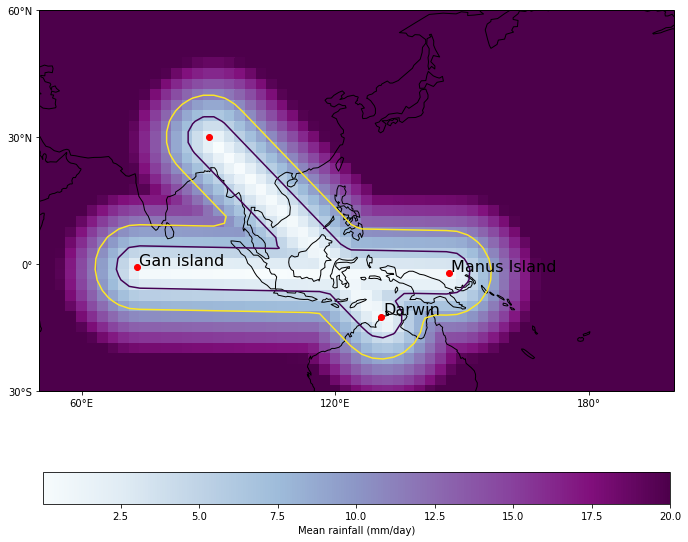

In [41]:
fig = plt.figure(figsize = [15,10])
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global() 
ax.coastlines()
cf = ax.pcolormesh(lons, lats, min_dist,
                transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BuPu'), vmax = 20)

cont = ax.contour(lons, lats, min_dist,
                transform=ccrs.PlateCarree(), levels = [5, 10])



ax.plot([darwin[1], manus[1], gan[1], north_anchor[1]], 
        [darwin[0], manus[0], gan[0], north_anchor[0]],
       'ro', transform=ccrs.PlateCarree())

ax.text(darwin[1]+.5, darwin[0]+.5, 
        'Darwin', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(gan[1]+.5, gan[0]+.5, 
        'Gan island', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(manus[1]+.5, manus[0]+.5, 
        'Manus Island', transform=ccrs.PlateCarree(), fontsize = 16)


ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([50, 200, -30, 60], crs=ccrs.PlateCarree())
 
cb = plt.colorbar(mappable=cf, orientation='horizontal', 
                  label='Mean rainfall (mm/day)', shrink=0.75)



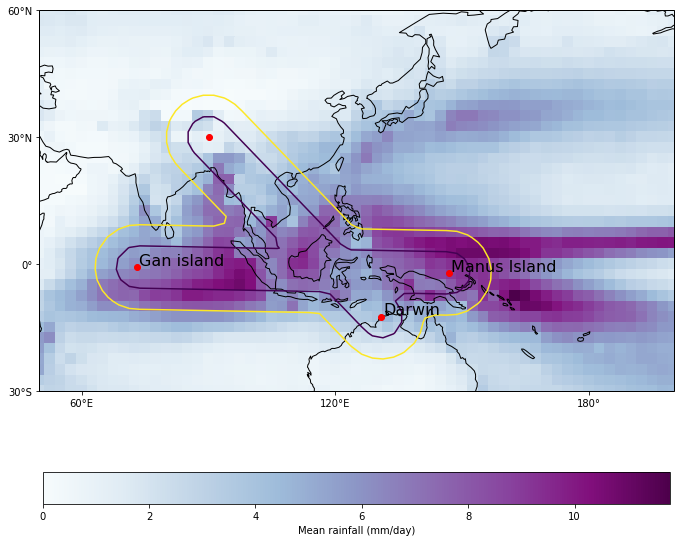

In [42]:
fig = plt.figure(figsize = [15,10])
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global() 
ax.coastlines()
cf = ax.pcolormesh(lons, lats, precip.mean(axis=0),
                transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BuPu'))

cont = ax.contour(lons, lats, min_dist,
                transform=ccrs.PlateCarree(), levels = [5, 10])



ax.plot([darwin[1], manus[1], gan[1], north_anchor[1]], 
        [darwin[0], manus[0], gan[0], north_anchor[0]],
       'ro', transform=ccrs.PlateCarree())

ax.text(darwin[1]+.5, darwin[0]+.5, 
        'Darwin', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(gan[1]+.5, gan[0]+.5, 
        'Gan island', transform=ccrs.PlateCarree(), fontsize = 16)

ax.text(manus[1]+.5, manus[0]+.5, 
        'Manus Island', transform=ccrs.PlateCarree(), fontsize = 16)


ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([50, 200, -30, 60], crs=ccrs.PlateCarree())
 
cb = plt.colorbar(mappable=cf, orientation='horizontal', 
                  label='Mean rainfall (mm/day)', shrink=0.75)

